# Getting started with Word2Vec in Gensim and making it work!

The idea behind Word2Vec is pretty simple. We are making and assumption that you can tell the meaning of a word by the company it keeps. This is analogous to the saying *show me your friends, and I'll tell who you are*. So if you have two words that have very similar neighbors (i.e. the usage context is about the same), then these words are probably quite similar in meaning or are at least highly related. For example, the words `shocked`,`appalled` and `astonished` are typically used in a similar context. 

In this tutorial, you will learn how to use the Gensim implementation of Word2Vec and actually get it to work! I have heard a lot of complaints about poor performance etc, but its really a combination of two things, (1) your input data and (2) your parameter settings. Note that the training algorithms in this package were ported from the [original Word2Vec implementation by Google](https://arxiv.org/pdf/1301.3781.pdf) and extended with additional functionality.

### Imports and logging

First, we start with our imports and get logging established:

In [2]:
# imports needed and set up logging
import gzip
import gensim 
import logging
import glob, os
import math
import numpy as np

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


### Dataset 
Next, is our dataset. The secret to getting Word2Vec really working for you is to have lots and lots of text data. In this case I am going to use data from the [OpinRank](http://kavita-ganesan.com/entity-ranking-data/) dataset. This dataset has full user reviews of cars and hotels. I have specifically concatenated all of the hotel reviews into one big file which is about 97MB compressed and 229MB uncompressed. We will use the compressed file for this tutorial. Each line in this file represents a hotel review. You can download the OpinRank Word2Vec dataset here.

To avoid confusion, while gensim’s word2vec tutorial says that you need to pass it a sequence of sentences as its input, you can always pass it a whole review as a sentence (i.e. a much larger size of text), and it should not make much of a difference. 

Now, let's take a closer look at this data below by printing the first line. You can see that this is a pretty hefty review.

In [142]:
data_file2="/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/0*9/*"

### Read files into a list
Now that we've had a sneak peak of our dataset, we can read it into a list so that we can pass this on to the Word2Vec model. Notice in the code below, that I am directly reading the 
compressed file. I'm also doing a mild pre-processing of the reviews using `gensim.utils.simple_preprocess (line)`. This does some basic pre-processing such as tokenization, lowercasing, etc and returns back a list of tokens (words). Documentation of this pre-processing method can be found on the official [Gensim documentation site](https://radimrehurek.com/gensim/utils.html). 



In [159]:
%%time 

filenames=[]

def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    for file in glob.glob(input_file):
        with open(file, 'rb') as f:
            filenames.append(file)
            for i, line in enumerate (f): 
            #if (i%10000==0):
                #logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
                yield gensim.utils.simple_preprocess (line)
            yield ["GXO_EOF","GXO_EOF","GXO_EOF","GXO_EOF","GXO_EOF"]

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents2 = list (read_input(data_file2))

logging.info ("Done reading data file")    

2019-09-15 03:02:44,835 : INFO : reading file /mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/0*9/*...this may take a while
2019-09-15 03:02:50,518 : INFO : Done reading data file


CPU times: user 5.47 s, sys: 212 ms, total: 5.68 s
Wall time: 5.68 s


## Training the Word2Vec model

Training the model is fairly straightforward. You just instantiate Word2Vec and pass the reviews that we read in the previous step (the `documents`). So, we are essentially passing on a list of lists. Where each list within the main list contains a set of tokens from a user review. Word2Vec uses all these tokens to internally create a vocabulary. And by vocabulary, I mean a set of unique words.

After building the vocabulary, we just need to call `train(...)` to start training the Word2Vec model. Training on the [OpinRank](http://kavita-ganesan.com/entity-ranking-data/) dataset takes about 10 minutes so please be patient while running your code on this dataset.

Behind the scenes we are actually training a simple neural network with a single hidden layer. But, we are actually not going to use the neural network after training. Instead, the goal is to learn the weights of the hidden layer. These weights are essentially the word vectors that we’re trying to learn. 

In [144]:
model = gensim.models.Word2Vec (documents2, size=150, window=10, min_count=1, workers=80)
model.train(documents2,total_examples=len(documents2),epochs=10)

2019-09-15 02:42:28,404 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-15 02:42:28,405 : INFO : collecting all words and their counts
2019-09-15 02:42:28,405 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-15 02:42:28,412 : INFO : PROGRESS: at sentence #10000, processed 33289 words, keeping 6617 word types
2019-09-15 02:42:28,420 : INFO : PROGRESS: at sentence #20000, processed 70428 words, keeping 11881 word types
2019-09-15 02:42:28,427 : INFO : PROGRESS: at sentence #30000, processed 108494 words, keeping 16773 word types
2019-09-15 02:42:28,435 : INFO : PROGRESS: at sentence #40000, processed 147286 words, keeping 20745 word types
2019-09-15 02:42:28,444 : INFO : PROGRESS: at sentence #50000, processed 192999 words, keeping 24885 word types
2019-09-15 02:42:28,452 : INFO : PROGRESS: at sentence #60000, processed 231207 words, keeping 28543 word types
2019-09-15 02:42:28,460 : INFO : PROGRESS: at sentence

2019-09-15 02:42:28,983 : INFO : PROGRESS: at sentence #710000, processed 2607925 words, keeping 196792 word types
2019-09-15 02:42:28,991 : INFO : PROGRESS: at sentence #720000, processed 2644599 words, keeping 199529 word types
2019-09-15 02:42:28,999 : INFO : PROGRESS: at sentence #730000, processed 2684228 words, keeping 201831 word types
2019-09-15 02:42:29,007 : INFO : PROGRESS: at sentence #740000, processed 2722856 words, keeping 203770 word types
2019-09-15 02:42:29,015 : INFO : PROGRESS: at sentence #750000, processed 2761707 words, keeping 206159 word types
2019-09-15 02:42:29,023 : INFO : PROGRESS: at sentence #760000, processed 2799054 words, keeping 208719 word types
2019-09-15 02:42:29,031 : INFO : PROGRESS: at sentence #770000, processed 2831844 words, keeping 210610 word types
2019-09-15 02:42:29,039 : INFO : PROGRESS: at sentence #780000, processed 2871345 words, keeping 212848 word types
2019-09-15 02:42:29,047 : INFO : collected 214491 word types from a corpus of 29

2019-09-15 02:42:34,111 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-09-15 02:42:34,114 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-09-15 02:42:34,115 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-09-15 02:42:34,115 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-15 02:42:34,115 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-15 02:42:34,117 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-15 02:42:34,119 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-15 02:42:34,120 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-15 02:42:34,121 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-15 02:42:34,124 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-15 02:42:34,125 : INFO : worker thread finished; awaiting finish of 2 more thre

2019-09-15 02:42:35,978 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-15 02:42:35,979 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-15 02:42:35,980 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-15 02:42:35,982 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-15 02:42:35,983 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-15 02:42:35,988 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-15 02:42:35,988 : INFO : EPOCH - 2 : training on 2908849 raw words (2704141 effective words) took 1.8s, 1477575 effective words/s
2019-09-15 02:42:37,014 : INFO : EPOCH 3 - PROGRESS: at 33.39% examples, 918791 words/s, in_qsize 158, out_qsize 2
2019-09-15 02:42:37,554 : INFO : worker thread finished; awaiting finish of 79 more threads
2019-09-15 02:42:37,556 : INFO : worker thread finished; awaiting finish of 78 more threads
2019-09-15 02:42:

2019-09-15 02:42:38,858 : INFO : EPOCH 4 - PROGRESS: at 35.30% examples, 951011 words/s, in_qsize 159, out_qsize 0
2019-09-15 02:42:39,380 : INFO : worker thread finished; awaiting finish of 79 more threads
2019-09-15 02:42:39,382 : INFO : worker thread finished; awaiting finish of 78 more threads
2019-09-15 02:42:39,385 : INFO : worker thread finished; awaiting finish of 77 more threads
2019-09-15 02:42:39,395 : INFO : worker thread finished; awaiting finish of 76 more threads
2019-09-15 02:42:39,403 : INFO : worker thread finished; awaiting finish of 75 more threads
2019-09-15 02:42:39,406 : INFO : worker thread finished; awaiting finish of 74 more threads
2019-09-15 02:42:39,413 : INFO : worker thread finished; awaiting finish of 73 more threads
2019-09-15 02:42:39,419 : INFO : worker thread finished; awaiting finish of 72 more threads
2019-09-15 02:42:39,424 : INFO : worker thread finished; awaiting finish of 71 more threads
2019-09-15 02:42:39,432 : INFO : worker thread finished; 

2019-09-15 02:42:41,249 : INFO : worker thread finished; awaiting finish of 73 more threads
2019-09-15 02:42:41,260 : INFO : worker thread finished; awaiting finish of 72 more threads
2019-09-15 02:42:41,263 : INFO : worker thread finished; awaiting finish of 71 more threads
2019-09-15 02:42:41,265 : INFO : worker thread finished; awaiting finish of 70 more threads
2019-09-15 02:42:41,274 : INFO : worker thread finished; awaiting finish of 69 more threads
2019-09-15 02:42:41,282 : INFO : worker thread finished; awaiting finish of 68 more threads
2019-09-15 02:42:41,287 : INFO : worker thread finished; awaiting finish of 67 more threads
2019-09-15 02:42:41,293 : INFO : worker thread finished; awaiting finish of 66 more threads
2019-09-15 02:42:41,299 : INFO : worker thread finished; awaiting finish of 65 more threads
2019-09-15 02:42:41,301 : INFO : worker thread finished; awaiting finish of 64 more threads
2019-09-15 02:42:41,305 : INFO : worker thread finished; awaiting finish of 63 m

2019-09-15 02:42:43,091 : INFO : worker thread finished; awaiting finish of 70 more threads
2019-09-15 02:42:43,092 : INFO : worker thread finished; awaiting finish of 69 more threads
2019-09-15 02:42:43,102 : INFO : worker thread finished; awaiting finish of 68 more threads
2019-09-15 02:42:43,113 : INFO : worker thread finished; awaiting finish of 67 more threads
2019-09-15 02:42:43,118 : INFO : worker thread finished; awaiting finish of 66 more threads
2019-09-15 02:42:43,124 : INFO : worker thread finished; awaiting finish of 65 more threads
2019-09-15 02:42:43,138 : INFO : worker thread finished; awaiting finish of 64 more threads
2019-09-15 02:42:43,143 : INFO : worker thread finished; awaiting finish of 63 more threads
2019-09-15 02:42:43,148 : INFO : worker thread finished; awaiting finish of 62 more threads
2019-09-15 02:42:43,150 : INFO : worker thread finished; awaiting finish of 61 more threads
2019-09-15 02:42:43,162 : INFO : worker thread finished; awaiting finish of 60 m

2019-09-15 02:42:44,999 : INFO : worker thread finished; awaiting finish of 63 more threads
2019-09-15 02:42:45,000 : INFO : worker thread finished; awaiting finish of 62 more threads
2019-09-15 02:42:45,006 : INFO : worker thread finished; awaiting finish of 61 more threads
2019-09-15 02:42:45,011 : INFO : worker thread finished; awaiting finish of 60 more threads
2019-09-15 02:42:45,016 : INFO : worker thread finished; awaiting finish of 59 more threads
2019-09-15 02:42:45,018 : INFO : worker thread finished; awaiting finish of 58 more threads
2019-09-15 02:42:45,027 : INFO : worker thread finished; awaiting finish of 57 more threads
2019-09-15 02:42:45,036 : INFO : worker thread finished; awaiting finish of 56 more threads
2019-09-15 02:42:45,042 : INFO : worker thread finished; awaiting finish of 55 more threads
2019-09-15 02:42:45,046 : INFO : worker thread finished; awaiting finish of 54 more threads
2019-09-15 02:42:45,054 : INFO : worker thread finished; awaiting finish of 53 m

2019-09-15 02:42:46,826 : INFO : worker thread finished; awaiting finish of 56 more threads
2019-09-15 02:42:46,828 : INFO : worker thread finished; awaiting finish of 55 more threads
2019-09-15 02:42:46,830 : INFO : worker thread finished; awaiting finish of 54 more threads
2019-09-15 02:42:46,833 : INFO : worker thread finished; awaiting finish of 53 more threads
2019-09-15 02:42:46,843 : INFO : worker thread finished; awaiting finish of 52 more threads
2019-09-15 02:42:46,846 : INFO : worker thread finished; awaiting finish of 51 more threads
2019-09-15 02:42:46,848 : INFO : worker thread finished; awaiting finish of 50 more threads
2019-09-15 02:42:46,852 : INFO : worker thread finished; awaiting finish of 49 more threads
2019-09-15 02:42:46,854 : INFO : worker thread finished; awaiting finish of 48 more threads
2019-09-15 02:42:46,871 : INFO : worker thread finished; awaiting finish of 47 more threads
2019-09-15 02:42:46,874 : INFO : worker thread finished; awaiting finish of 46 m

2019-09-15 02:42:48,680 : INFO : worker thread finished; awaiting finish of 49 more threads
2019-09-15 02:42:48,684 : INFO : worker thread finished; awaiting finish of 48 more threads
2019-09-15 02:42:48,686 : INFO : worker thread finished; awaiting finish of 47 more threads
2019-09-15 02:42:48,693 : INFO : worker thread finished; awaiting finish of 46 more threads
2019-09-15 02:42:48,701 : INFO : worker thread finished; awaiting finish of 45 more threads
2019-09-15 02:42:48,703 : INFO : worker thread finished; awaiting finish of 44 more threads
2019-09-15 02:42:48,711 : INFO : worker thread finished; awaiting finish of 43 more threads
2019-09-15 02:42:48,719 : INFO : worker thread finished; awaiting finish of 42 more threads
2019-09-15 02:42:48,723 : INFO : worker thread finished; awaiting finish of 41 more threads
2019-09-15 02:42:48,734 : INFO : worker thread finished; awaiting finish of 40 more threads
2019-09-15 02:42:48,735 : INFO : worker thread finished; awaiting finish of 39 m

2019-09-15 02:42:50,553 : INFO : worker thread finished; awaiting finish of 42 more threads
2019-09-15 02:42:50,554 : INFO : worker thread finished; awaiting finish of 41 more threads
2019-09-15 02:42:50,554 : INFO : worker thread finished; awaiting finish of 40 more threads
2019-09-15 02:42:50,559 : INFO : worker thread finished; awaiting finish of 39 more threads
2019-09-15 02:42:50,563 : INFO : worker thread finished; awaiting finish of 38 more threads
2019-09-15 02:42:50,569 : INFO : worker thread finished; awaiting finish of 37 more threads
2019-09-15 02:42:50,571 : INFO : worker thread finished; awaiting finish of 36 more threads
2019-09-15 02:42:50,580 : INFO : worker thread finished; awaiting finish of 35 more threads
2019-09-15 02:42:50,584 : INFO : worker thread finished; awaiting finish of 34 more threads
2019-09-15 02:42:50,591 : INFO : worker thread finished; awaiting finish of 33 more threads
2019-09-15 02:42:50,593 : INFO : worker thread finished; awaiting finish of 32 m

2019-09-15 02:42:52,419 : INFO : worker thread finished; awaiting finish of 35 more threads
2019-09-15 02:42:52,421 : INFO : worker thread finished; awaiting finish of 34 more threads
2019-09-15 02:42:52,424 : INFO : worker thread finished; awaiting finish of 33 more threads
2019-09-15 02:42:52,425 : INFO : worker thread finished; awaiting finish of 32 more threads
2019-09-15 02:42:52,429 : INFO : worker thread finished; awaiting finish of 31 more threads
2019-09-15 02:42:52,431 : INFO : worker thread finished; awaiting finish of 30 more threads
2019-09-15 02:42:52,439 : INFO : worker thread finished; awaiting finish of 29 more threads
2019-09-15 02:42:52,443 : INFO : worker thread finished; awaiting finish of 28 more threads
2019-09-15 02:42:52,446 : INFO : worker thread finished; awaiting finish of 27 more threads
2019-09-15 02:42:52,449 : INFO : worker thread finished; awaiting finish of 26 more threads
2019-09-15 02:42:52,449 : INFO : worker thread finished; awaiting finish of 25 m

2019-09-15 02:42:54,282 : INFO : worker thread finished; awaiting finish of 28 more threads
2019-09-15 02:42:54,283 : INFO : worker thread finished; awaiting finish of 27 more threads
2019-09-15 02:42:54,284 : INFO : worker thread finished; awaiting finish of 26 more threads
2019-09-15 02:42:54,285 : INFO : worker thread finished; awaiting finish of 25 more threads
2019-09-15 02:42:54,285 : INFO : worker thread finished; awaiting finish of 24 more threads
2019-09-15 02:42:54,286 : INFO : worker thread finished; awaiting finish of 23 more threads
2019-09-15 02:42:54,287 : INFO : worker thread finished; awaiting finish of 22 more threads
2019-09-15 02:42:54,287 : INFO : worker thread finished; awaiting finish of 21 more threads
2019-09-15 02:42:54,288 : INFO : worker thread finished; awaiting finish of 20 more threads
2019-09-15 02:42:54,289 : INFO : worker thread finished; awaiting finish of 19 more threads
2019-09-15 02:42:54,289 : INFO : worker thread finished; awaiting finish of 18 m

2019-09-15 02:42:56,112 : INFO : worker thread finished; awaiting finish of 21 more threads
2019-09-15 02:42:56,114 : INFO : worker thread finished; awaiting finish of 20 more threads
2019-09-15 02:42:56,115 : INFO : worker thread finished; awaiting finish of 19 more threads
2019-09-15 02:42:56,118 : INFO : worker thread finished; awaiting finish of 18 more threads
2019-09-15 02:42:56,118 : INFO : worker thread finished; awaiting finish of 17 more threads
2019-09-15 02:42:56,119 : INFO : worker thread finished; awaiting finish of 16 more threads
2019-09-15 02:42:56,119 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-09-15 02:42:56,119 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-09-15 02:42:56,120 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-09-15 02:42:56,120 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-09-15 02:42:56,120 : INFO : worker thread finished; awaiting finish of 11 m

2019-09-15 02:42:57,955 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-09-15 02:42:57,955 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-09-15 02:42:57,956 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-09-15 02:42:57,956 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-09-15 02:42:57,957 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-09-15 02:42:57,957 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-15 02:42:57,958 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-15 02:42:57,961 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-15 02:42:57,963 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-15 02:42:57,964 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-15 02:42:57,964 : INFO : worker thread finished; awaiting finish of 4 more th

2019-09-15 02:42:59,784 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-15 02:42:59,785 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-15 02:42:59,791 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-15 02:42:59,793 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-15 02:42:59,796 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-15 02:42:59,797 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-15 02:42:59,798 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-15 02:42:59,798 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-15 02:42:59,798 : INFO : EPOCH - 10 : training on 2908849 raw words (2704227 effective words) took 1.8s, 1500257 effective words/s
2019-09-15 02:42:59,799 : INFO : training on a 29088490 raw words (27042553 effective words) took 18.3s, 1478990 effective words/s


(27042553, 29088490)

## Now, let's look at some output 
This first example shows a simple case of looking up words similar to the word `dirty`. All we need to do here is to call the `most_similar` function and provide the word `dirty` as the positive example. This returns the top 10 similar words. 

That looks pretty good, right? Let's look at a few more. Let's look at similarity for `polite`, `france` and `shocked`. 

In [145]:
# look up top 6 words similar to 'polite'
w1 = ["porn"]
model.wv.most_similar(positive=w1,topn=10)

2019-09-15 02:43:04,175 : INFO : precomputing L2-norms of word weight vectors


[('tube', 0.8736795783042908),
 ('sex', 0.8494071960449219),
 ('asian', 0.807878851890564),
 ('amateur', 0.7919368147850037),
 ('videos', 0.7812559008598328),
 ('lesbian', 0.7718877792358398),
 ('masturbating', 0.7674655914306641),
 ('mature', 0.7661670446395874),
 ('hot', 0.7652118802070618),
 ('deen', 0.7588047385215759)]

In [146]:
model.wv.most_similar_cosmul(positive=w1,topn=10) #using the multiplicative combination objective

[('tube', 0.9368389248847961),
 ('sex', 0.9247027039527893),
 ('asian', 0.9039385914802551),
 ('amateur', 0.8959676027297974),
 ('videos', 0.8906271457672119),
 ('lesbian', 0.8859430551528931),
 ('masturbating', 0.8837319612503052),
 ('mature', 0.8830826878547668),
 ('hot', 0.8826050758361816),
 ('deen', 0.8794015645980835)]

That's, nice. You can even specify several positive examples to get things that are related in the provided context and provide negative examples to say what should not be considered as related. In the example below we are asking for all items that *relate to bed* only:

In [147]:
def vectors_creator(file):
    with open(file, 'rb') as f:
        word_list=[]
        vec_list=[]
        #sum_list=np.zeros(150)
        count=0
        for line in f: 
            word_list+=gensim.utils.simple_preprocess(line)
        for i in word_list:
            count+=1
            vec_list.append(model.wv.get_vector(i)) #vector

        q1=sum(vec_list[:math.ceil(count/4)])
        q2=sum(vec_list[math.ceil(count/4):math.ceil(count/2)])
        q3=sum(vec_list[math.ceil(count/2):math.ceil(3*count/4)])
        q4=sum(vec_list[math.ceil(3*count/4):])
        q1_234=q1-(q2+q3+q4)
        q12_34=(q1+q2)-(q3+q4)
        q123_4=(q1+q2+q3)-q4
        sum_vec=sum(vec_list)
        if count==0:
            filenames.remove(file)
            return []
        average_vec=sum_vec/count #average
        return(np.concatenate((average_vec,q1_234, q12_34, q123_4)))
    
files_vectors=[]
for file in glob.glob(data_file2):
    toadd=vectors_creator(file)
    if len(toadd)!=0:
        files_vectors.append(toadd)

    

In [148]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [157]:
X=np.array(files_vectors)
P=X[1]
#print(len(X))
#print(len(X[1]))
kmeans = KMeans(n_clusters=100, random_state=0).fit(X)

[ 0 48 10 67 34 81 44 39 36 95 65  8  4 20 78 51 31 55 73 15  7 25 32 46
 96 69 85 89 16 74 38  2 61 49 37 40 45 29 87 54 50 27 97 13 23 66 19 17
 12 47 63  6 76 11 42 22 68 99 28 35 24 98 64 26 91 72 70 18 52 86 93 79
 62 14 43  3  1 56 77  5  9 53 59 41 58 80 57 75 33 30 83 82 88 90 92 71
 94 21 60 84]
[4661 1760  616  429  416  312  269  249  195  164  147  137  121  119
  113  100   81   79   68   60   55   52   51   50   48   46   45   45
   44   43   41   40   37   36   33   31   30   28   28   28   28   27
   24   24   23   22   22   17   16   16   16   15   14   14   13   13
   12   12   11   11   11   11   10    9    9    9    8    8    8    8
    8    7    6    6    5    5    5    5    4    4    4    4    3    3
    2    2    2    2    2    2    1    1    1    1    1    1    1    1
    1    1]
11439
11439


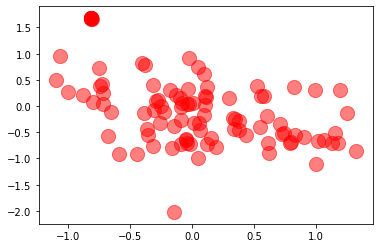

In [158]:
centers = kmeans.cluster_centers_
#print(kmeans.labels_)
labels, counts = np.unique(kmeans.labels_[kmeans.labels_>=0], return_counts=True)
print(labels[np.argsort(-counts)[:]])
print(counts[np.argsort(-counts)[:]])
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
print(len(filenames))
print(len(kmeans.labels_))

In [141]:
list(np.asarray(filenames)[np.where(kmeans.labels_==9)[0].tolist()])

['/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bf68ef850fd6791ac8ea6b22b08bd61b90aea06',
 '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bfd9084e8c43254e5615d85f32ec92b61d83d95',
 '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bf79824eb9e4522c4a5297a3112ff8056cf15e1',
 '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bf82d832509839b437529598cbc7532d02c004a',
 '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bfbfb8dd9ba398b57d3ce46eba24f70a8d500ed',
 '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bf4e9b1de3b6f6d73cce7a12c2ba061ae39fad8',
 '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bf1a591599950ad167c08dea5b2387111d44cd9',
 '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bfd50176ccd78f30bec1905cfda7e6075205db2',
 '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_da

### Similarity between two words in the vocabulary

You can even use the Word2Vec model to return the similarity between two words that are present in the vocabulary. 

Under the hood, the above three snippets computes the cosine similarity between the two specified words using word vectors of each. From the scores, it makes sense that `dirty` is highly similar to `smelly` but `dirty` is dissimilar to `clean`. If you do a similarity between two identical words, the score will be 1.0 as the range of the cosine similarity score will always be between [0.0-1.0]. You can read more about cosine similarity scoring [here](https://en.wikipedia.org/wiki/Cosine_similarity).

### Find the odd one out
You can even use Word2Vec to find odd items given a list of items.

## Understanding some of the parameters
To train the model earlier, we had to set some parameters. Now, let's try to understand what some of them mean. For reference, this is the command that we used to train the model.

```
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
```

### `size`
The size of the dense vector to represent each token or word. If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes. A value of 100-150 has worked well for me. 

### `window`
The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as its a decent sized window. 

### `min_count`
Minimium frequency count of words. The model would ignore words that do not statisfy the `min_count`. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

### `workers`
How many threads to use behind the scenes?


## When should you use Word2Vec?

There are many application scenarios for Word2Vec. Imagine if you need to build a sentiment lexicon. Training a Word2Vec model on large amounts of user reviews helps you achieve that. You have a lexicon for not just sentiment, but for most words in the vocabulary. 

Beyond, raw unstructured text data, you could also use Word2Vec for more structured data. For example, if you had tags for a million stackoverflow questions and answers, you could find tags that are related to a given tag and recommend the related ones for exploration. You can do this by treating each set of co-occuring tags as a "sentence" and train a Word2Vec model on this data. Granted, you still need a large number of examples to make it work. 
